<a href="https://colab.research.google.com/github/DhanashriSaner/ASD_Detection-deeplearning/blob/main/ASD_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 


In [ ]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcola

In [ ]:
import tensorflow_addons 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import efficientnet.tfkeras as efn
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense,Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.metrics import AUC, CategoricalAccuracy, Precision, Recall
import tensorflow as tf
import cv2
import random
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D

In [ ]:
train_path ='/content/drive/MyDrive/new/ASD_data/train/'
test_path = '/content/drive/MyDrive/new/ASD_data/test/'

In [ ]:
file_names = np.array(os.listdir(train_path))
lable_name = []
file_path = []
for filename in file_names:
    category = filename.split('.')[0]
    file_path.append(train_path+ filename)
    if category == 'Autistic':
        lable_name.append('Autistic')
    else:
        lable_name.append('Non_Autistic')
train_df = pd.DataFrame({
    'file_path': file_path,
    'label_name': lable_name
})

In [ ]:
file_names_test = np.array(os.listdir(test_path))
lable_name_test = []
file_path_test = []
for filename in file_names_test:
    category = filename.split('.')[0]
    file_path_test.append(train_path+ filename)
    if category == 'Autistic':
        lable_name_test.append('Autistic')
    else:
        lable_name_test.append('Non_Autistic')
test_df = pd.DataFrame({
    'file_path': file_path_test,
    'label_name': lable_name_test
})

In [ ]:
train_df.head()

,file_path,label_name
0,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
1,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
2,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
3,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
4,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic


In [ ]:
test_df.head()

,file_path,label_name
0,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
1,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
2,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
3,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
4,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic


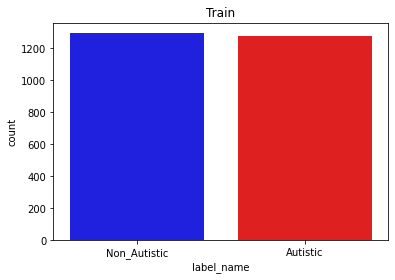

In [ ]:
sns.set_palette(sns.color_palette(["b", "r"]))
sns.countplot(x =train_df['label_name']).set(title='Train')

plt.show()

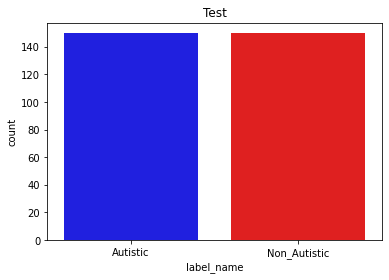

In [ ]:
sns.set_palette(sns.color_palette(["b", "r"]))
sns.countplot(x =test_df['label_name']).set(title='Test')

plt.show()

/content/drive/MyDrive/new/ASD_data/train/Autistic.864.jpg


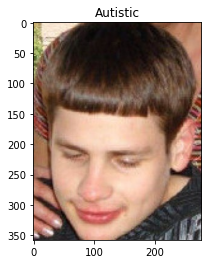

In [ ]:
sample = random.choice(file_path)
print(sample)
image = plt.imread(sample,format=None)
plt.title(sample.split('/')[-1].split('.')[0])
plt.imshow(image)
plt.show()

In [ ]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input
#     preprocessing_function = efn.preprocess_input
)

# Only rescaling the val set
val_gen = ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input
#     preprocessing_function = efn.preprocess_input
)

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)
epochs = 30
batch_size = 20


In [ ]:
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
total_train,total_validate

(2319, 258)

In [ ]:
train_df.head()

,index,file_path,label_name
0,1896,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
1,1770,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
2,610,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
3,635,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
4,1159,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic


In [ ]:
validate_df.head()

,index,file_path,label_name
0,604,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
1,1348,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
2,160,/content/drive/MyDrive/new/ASD_data/train/Non_...,Non_Autistic
3,1342,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
4,5,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic


In [ ]:
train_set = train_gen.flow_from_dataframe(
    train_df, 
    x_col='file_path',
    y_col='label_name',
    target_size=(image_size,image_size), 
    class_mode='categorical', 
    shuffle=True, 
    batch_size=batch_size)
val_set = val_gen.flow_from_dataframe(
    validate_df, 
    x_col='file_path',
    y_col='label_name',
    target_size=(image_size,image_size), 
    class_mode='categorical', 
    shuffle=True, 
    batch_size=batch_size)

Found 2319 validated image filenames belonging to 2 classes.
Found 258 validated image filenames belonging to 2 classes.


In [ ]:
class_dict = {v:k for k,v in train_set.class_indices.items()}
class_dict

{0: 'Autistic', 1: 'Non_Autistic'}

In [ ]:
train_set.image_shape,val_set.image_shape

((224, 224, 3), (224, 224, 3))

In [ ]:
def see_examples(datagen, figsize=(16,16),nrows=4, ncols=4):
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols)
    batch_idx = np.random.randint(low=0, high=len(datagen), size=(nrows,ncols))
    for i in range(nrows):
        for j in range(ncols):
            imgs, labels = datagen[batch_idx[i,j]]
            sample_idx = np.random.randint(low=0, high=len(imgs))
            img = imgs[sample_idx]
            label = labels[sample_idx]
            label = class_dict[np.argmax(label)]
            ax[i,j].axis('off')
            ax[i,j].imshow(img)
            ax[i,j].set_title(label)
    plt.show()

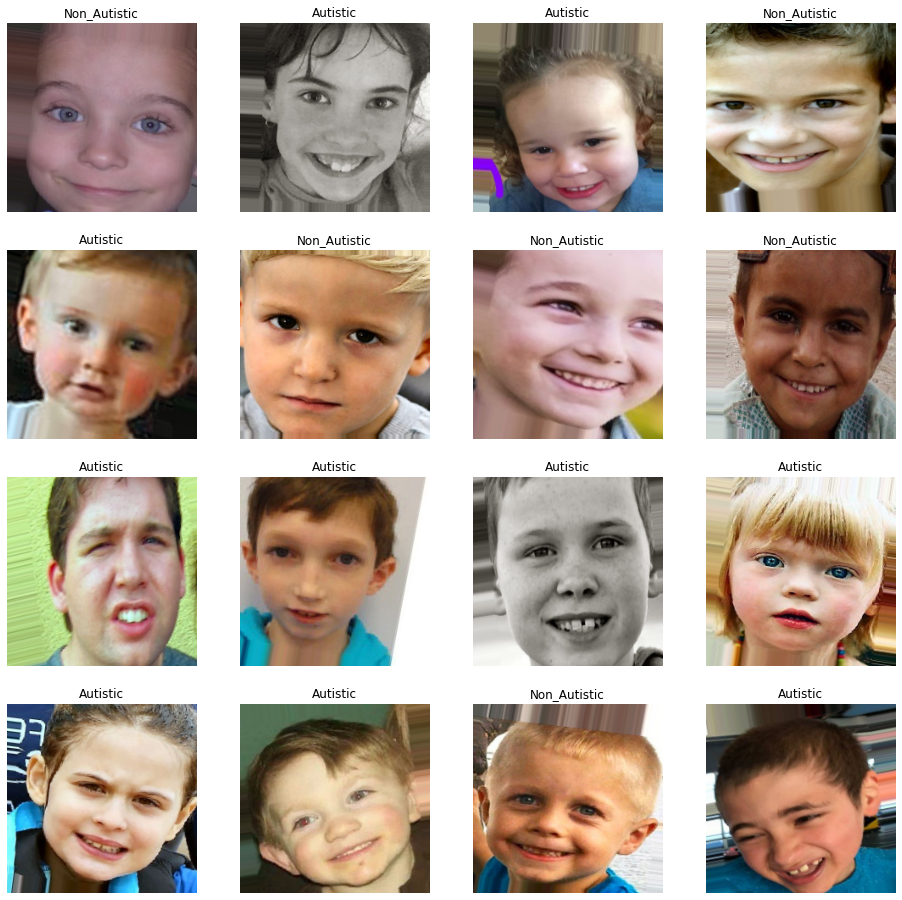

In [ ]:
see_examples(train_set)

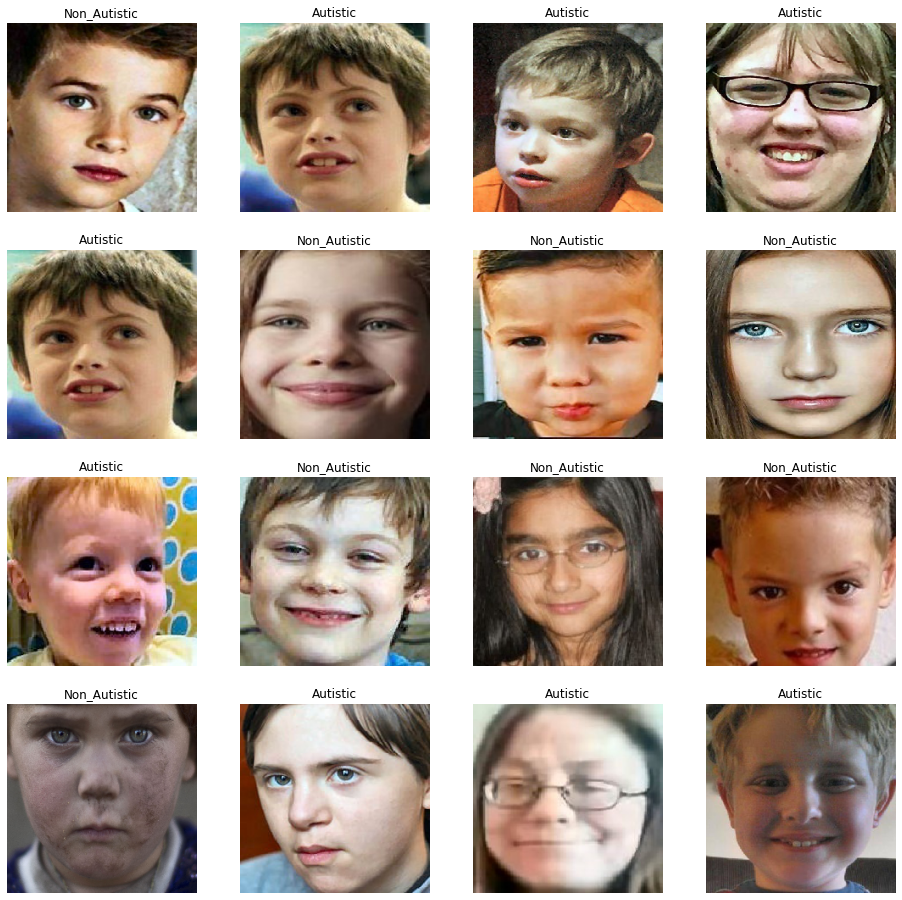

In [ ]:
see_examples(val_set)

In [ ]:
conv_base = efn.EfficientNetB0(input_shape=input_shape, include_top=False, weights="imagenet")
conv_base.trainable=True

In [ ]:
for layer in conv_base.layers:
  layer.trainable = False

In [ ]:
input_shape

(224, 224, 3)

In [ ]:
conv_base.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [ ]:
model = Sequential([
    conv_base,
    GlobalMaxPooling2D(),
    
    Dense(units=512,activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0

In [ ]:
callbacks = [
    EarlyStopping(min_delta=1e-5, patience=10),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

metrics = [
    CategoricalAccuracy(), 
#     F1Score(num_classes=2), 
#     Precision(), 
#     Recall(), 
#     AUC()
]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [ ]:
history = model.fit_generator(train_set,epochs=epochs, steps_per_epoch=total_train//batch_size,
                  validation_data=val_set, validation_steps=total_validate//batch_size,callbacks= callbacks
                             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
115/115 [==============================] - 68s 436ms/step - loss: 0.7003 - categorical_accuracy: 0.6733 - val_loss: 1.4430 - val_categorical_accuracy: 0.5667
Epoch 2/30
115/115 [==============================] - 42s 363ms/step - loss: 0.4500 - categorical_accuracy: 0.7882 - val_loss: 0.6447 - val_categorical_accuracy: 0.7500
Epoch 3/30
115/115 [==============================] - 41s 356ms/step - loss: 0.4096 - categorical_accuracy: 0.8217 - val_loss: 0.7596 - val_categorical_accuracy: 0.7875
Epoch 4/30
115/115 [==============================] - 41s 354ms/step - loss: 0.3942 - categorical_accuracy: 0.8365 - val_loss: 0.6307 - val_categorical_accuracy: 0.6792
Epoch 5/30
115/115 [==============================] - 42s 363ms/step - loss: 0.3595 - categorical_accuracy: 0.8447 - val_loss: 0.4631 - val_categorical_accuracy: 0.8083
Epoch 6/30
115/115 [==============================] - 41s 352ms/step - loss: 0.3196 - categorical_accuracy: 0.8617 - val_loss: 0.3281 - val_categorical_acc

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.head(16)

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.700259,0.673336,1.442978,0.566667
1,0.450014,0.788169,0.644735,0.750000
2,0.409574,0.821662,0.759598,0.787500
3,0.394242,0.836451,0.630670,0.679167
4,0.359509,0.844715,0.463142,0.808333
5,0.319597,0.861679,0.328125,0.866667
6,0.283901,0.882123,0.480009,0.820833
7,0.307523,0.873858,0.343608,0.833333
8,0.264416,0.889952,0.358191,0.833333
9,0.261241,0.903436,0.503164,0.816667


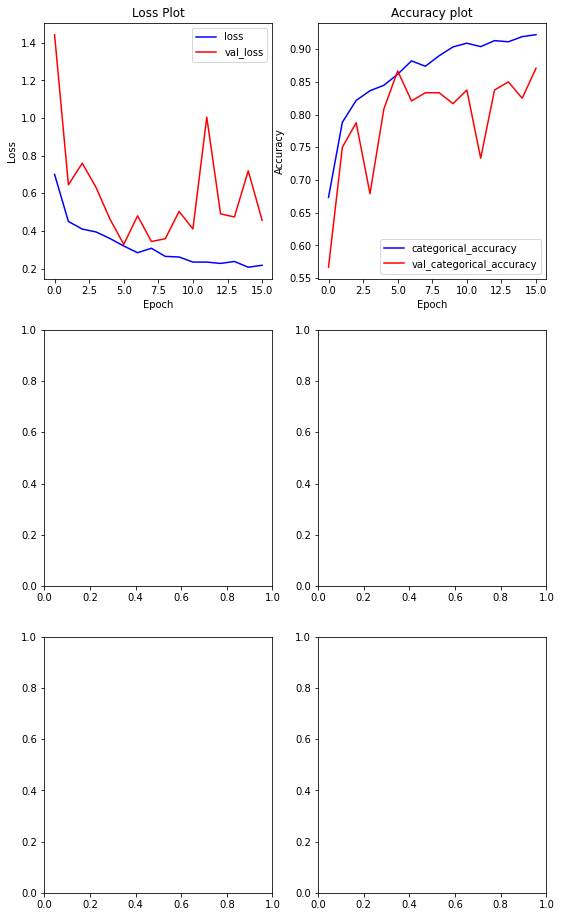

In [ ]:
fig, ax = plt.subplots(figsize=(9,16), nrows=3,ncols=2)
history_df[['loss','val_loss']].plot(ax=ax[0,0], xlabel='Epoch',ylabel='Loss', title='Loss Plot')
history_df[['categorical_accuracy','val_categorical_accuracy']].plot(
    ax=ax[0,1], xlabel='Epoch',ylabel='Accuracy',title='Accuracy plot')
plt.show()

In [ ]:
val_set_final = val_gen.flow_from_dataframe(
    test_df,x_col='file_path',
    y_col='label_name',
    class_mode='categorical',
    target_size=(image_size,image_size), 
    batch_size=batch_size, 
    shuffle=False)

Found 300 validated image filenames belonging to 2 classes.


In [ ]:
best_model = load_model('best_model.h5')

In [ ]:
val_loss,val_acc = best_model.evaluate(val_set_final)
val_preds = best_model.predict(val_set_final)
val_preds = val_preds.argmax(axis=1)
test_df.head()

15/15 [==============================] - 3s 97ms/step


,file_path,label_name
0,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
1,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
2,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
3,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic
4,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic


In [ ]:
val_set.class_indices

{'Autistic': 0, 'Non_Autistic': 1}

In [ ]:
test_df['Label'] = test_df['label_name'].map(val_set.class_indices)
test_df['Predicted'] = val_preds
test_df.head()

,file_path,label_name,Label,Predicted
0,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic,0,0
1,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic,0,0
2,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic,0,0
3,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic,0,0
4,/content/drive/MyDrive/new/ASD_data/train/Auti...,Autistic,0,0


In [ ]:
conf_mat = confusion_matrix(y_true=test_df['Label'], y_pred=test_df['Predicted'])
conf_mat = pd.DataFrame(conf_mat, index=val_set_final.class_indices.keys(), columns=val_set_final.class_indices.keys())

In [ ]:
conf_mat

,Autistic,Non_Autistic
Autistic,125,25
Non_Autistic,24,126


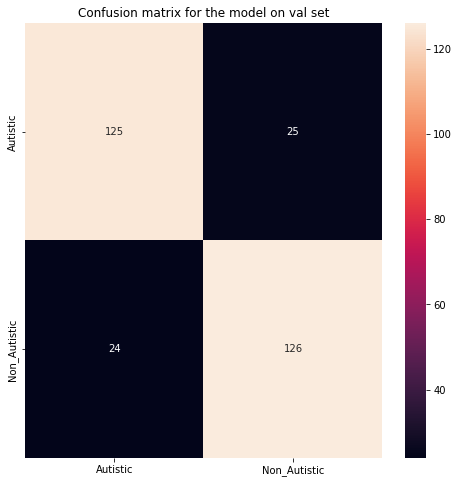

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, ax=ax , fmt='d')
ax.set_title('Confusion matrix for the model on val set')
plt.show()